In [2]:
!pip install kaggle

In [4]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [5]:

plt.style.use('fivethirtyeight')

#Set Kaggle credentials (make sure to replace with your own if needed)
os.environ['KAGGLE_USERNAME'] = "talhakhalid1996"
os.environ['KAGGLE_KEY'] = "84881a21d6519ce7088cdb6b36cf4517"

# Authenticate
api = KaggleApi()
api.authenticate()

# Download the dataset (note: this is a *dataset*, not a *competition*)
api.dataset_download_files('yasserh/housing-prices-dataset', path='.', unzip=True)




Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


In [6]:
#Load CSV directly 
df = pd.read_csv('Housing.csv') 

#Preview the dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
# Define bin edges based on the quantiles of the 'price' column
low = df['price'].quantile(0.25)  # 25th percentile
high = df['price'].quantile(0.75)  # 75th percentile

# Use pd.cut to bin the 'price' column into categories
bins = [0, low, high, df['price'].max()]
labels = ['Low', 'Medium', 'High']

# Create the 'price_bin' column
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Check the result
print(df[['price', 'price_bin']].head())

      price price_bin
0  13300000      High
1  12250000      High
2  12250000      High
3  12215000      High
4  11410000      High


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    object  
 6   guestroom         545 non-null    object  
 7   basement          545 non-null    object  
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
 13  price_bin         545 non-null    category
dtypes: category(1), int64(6), object(7)
memory usage: 56.1+ KB
None


In [9]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [10]:
# Checking for null values in the dataset
nulls = pd.DataFrame(df.isnull().sum(), columns=['Total'])
nulls['Total kPercentage'] = df.isnull().sum() / len(df) * 100
nulls = nulls.sort_values(by = 'Total kPercentage', ascending = False)
print(nulls)

                  Total  Total kPercentage
price                 0                0.0
area                  0                0.0
bedrooms              0                0.0
bathrooms             0                0.0
stories               0                0.0
mainroad              0                0.0
guestroom             0                0.0
basement              0                0.0
hotwaterheating       0                0.0
airconditioning       0                0.0
parking               0                0.0
prefarea              0                0.0
furnishingstatus      0                0.0
price_bin             0                0.0


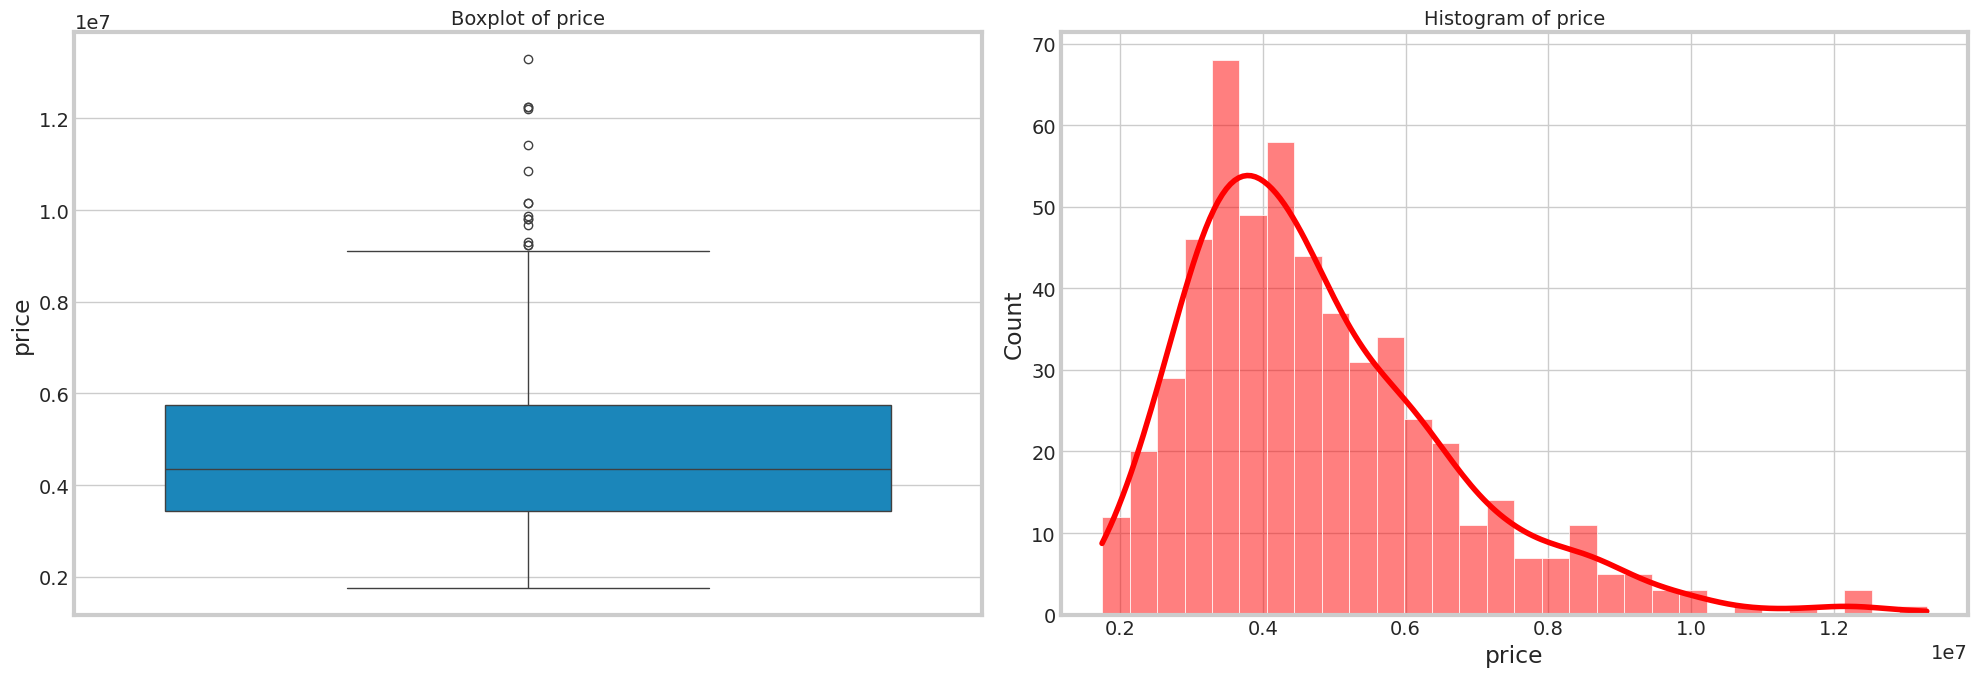

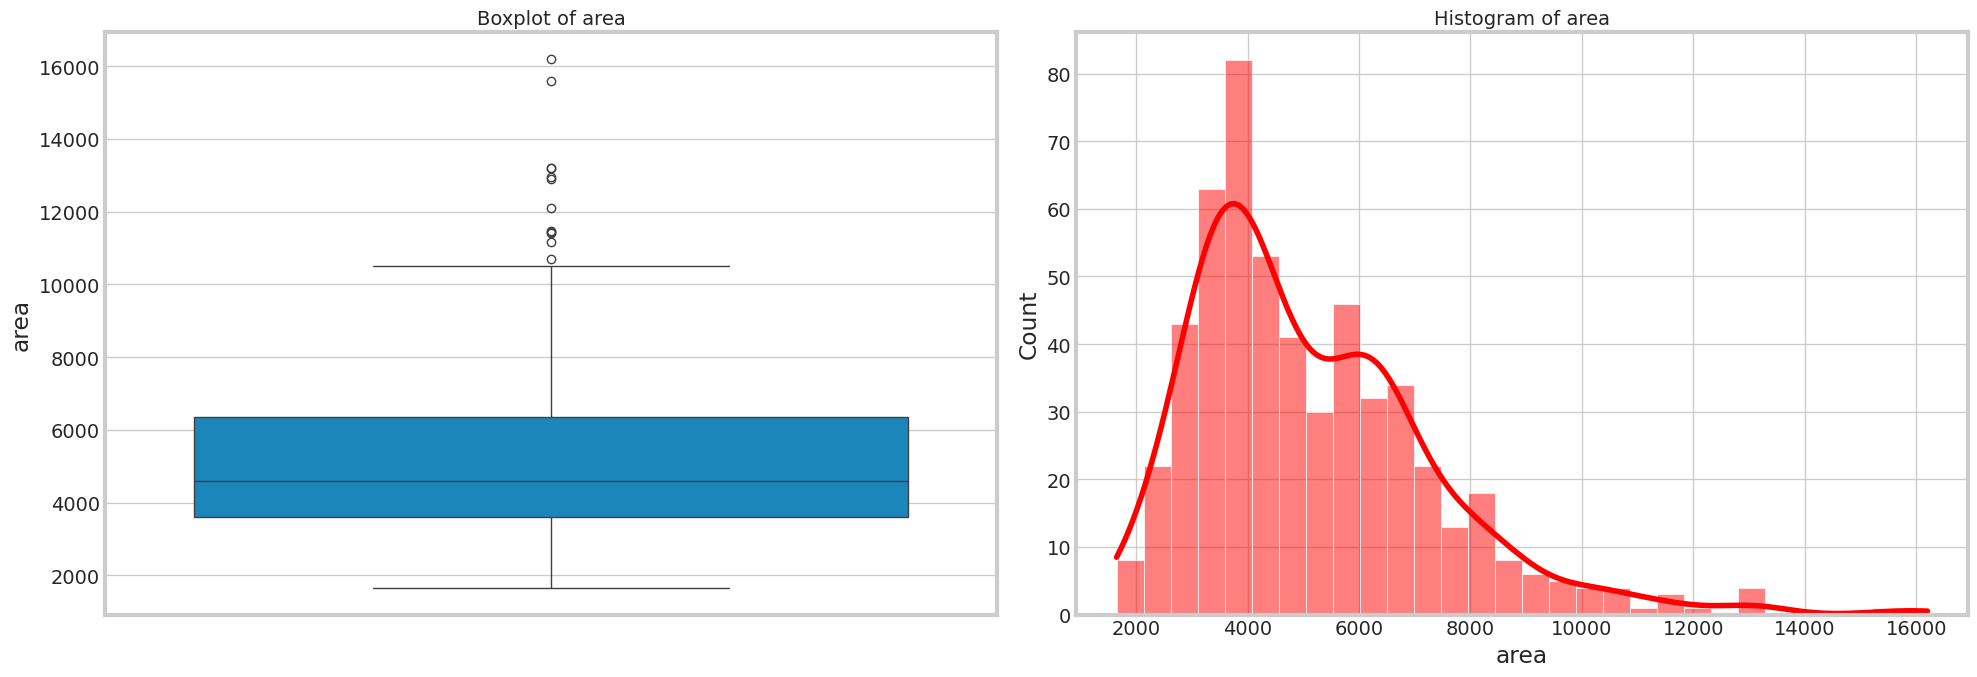

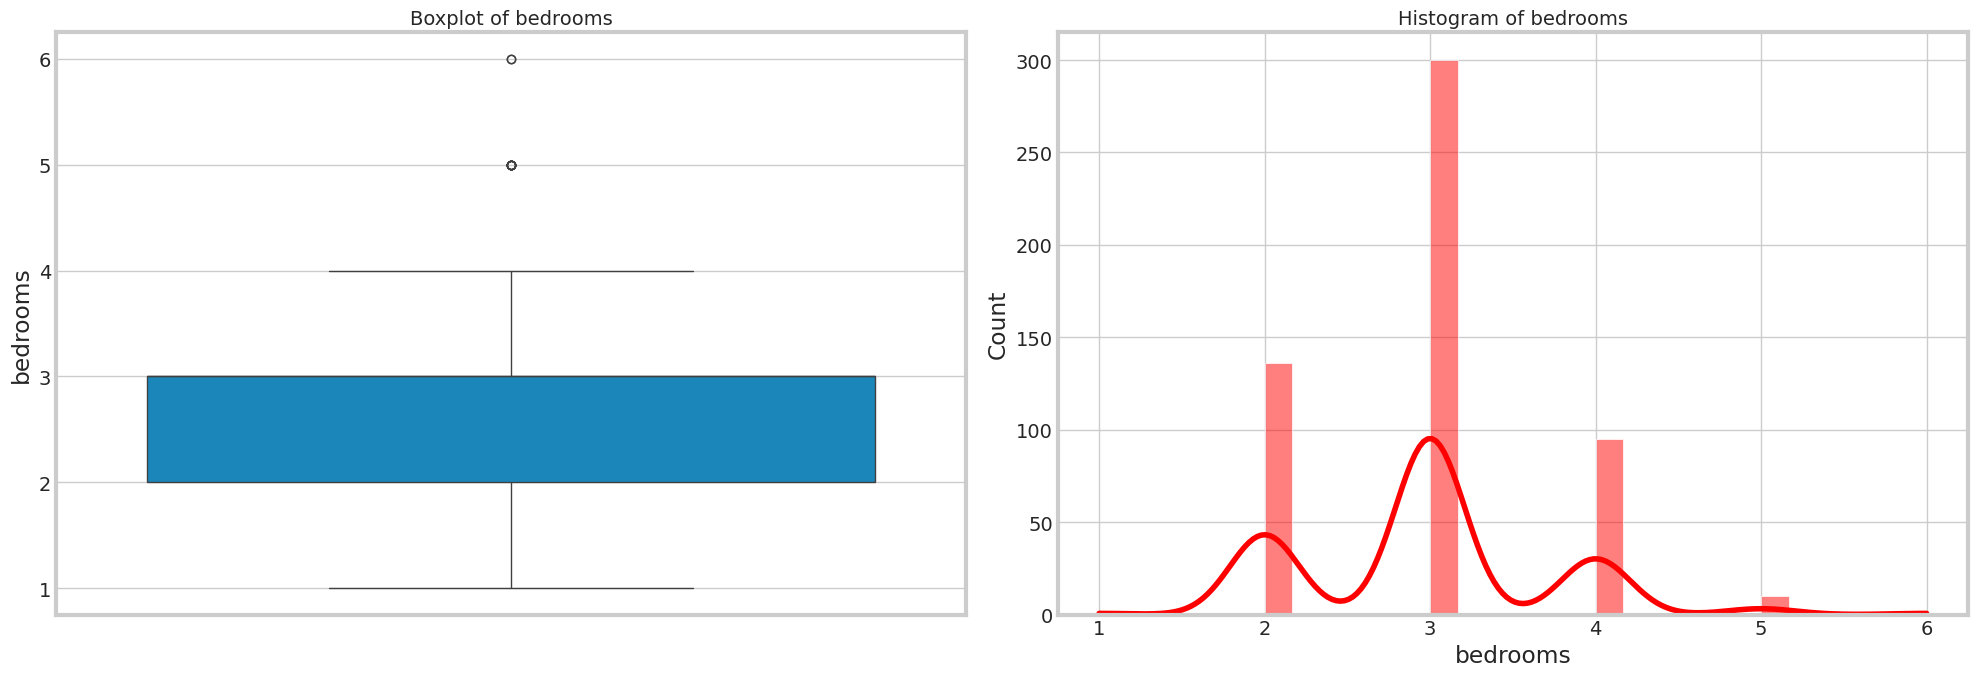

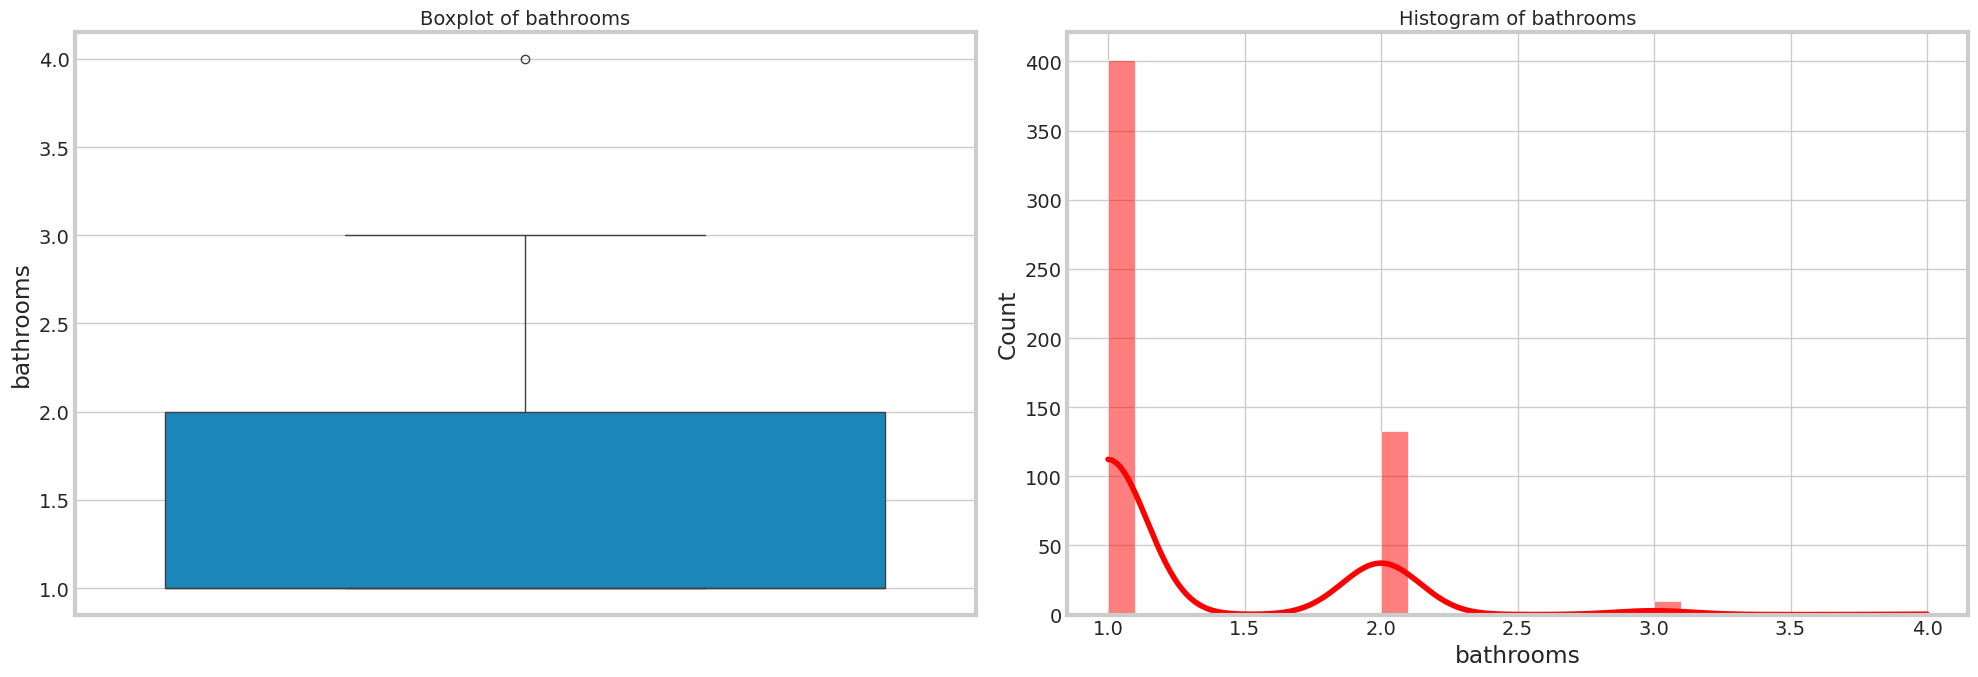

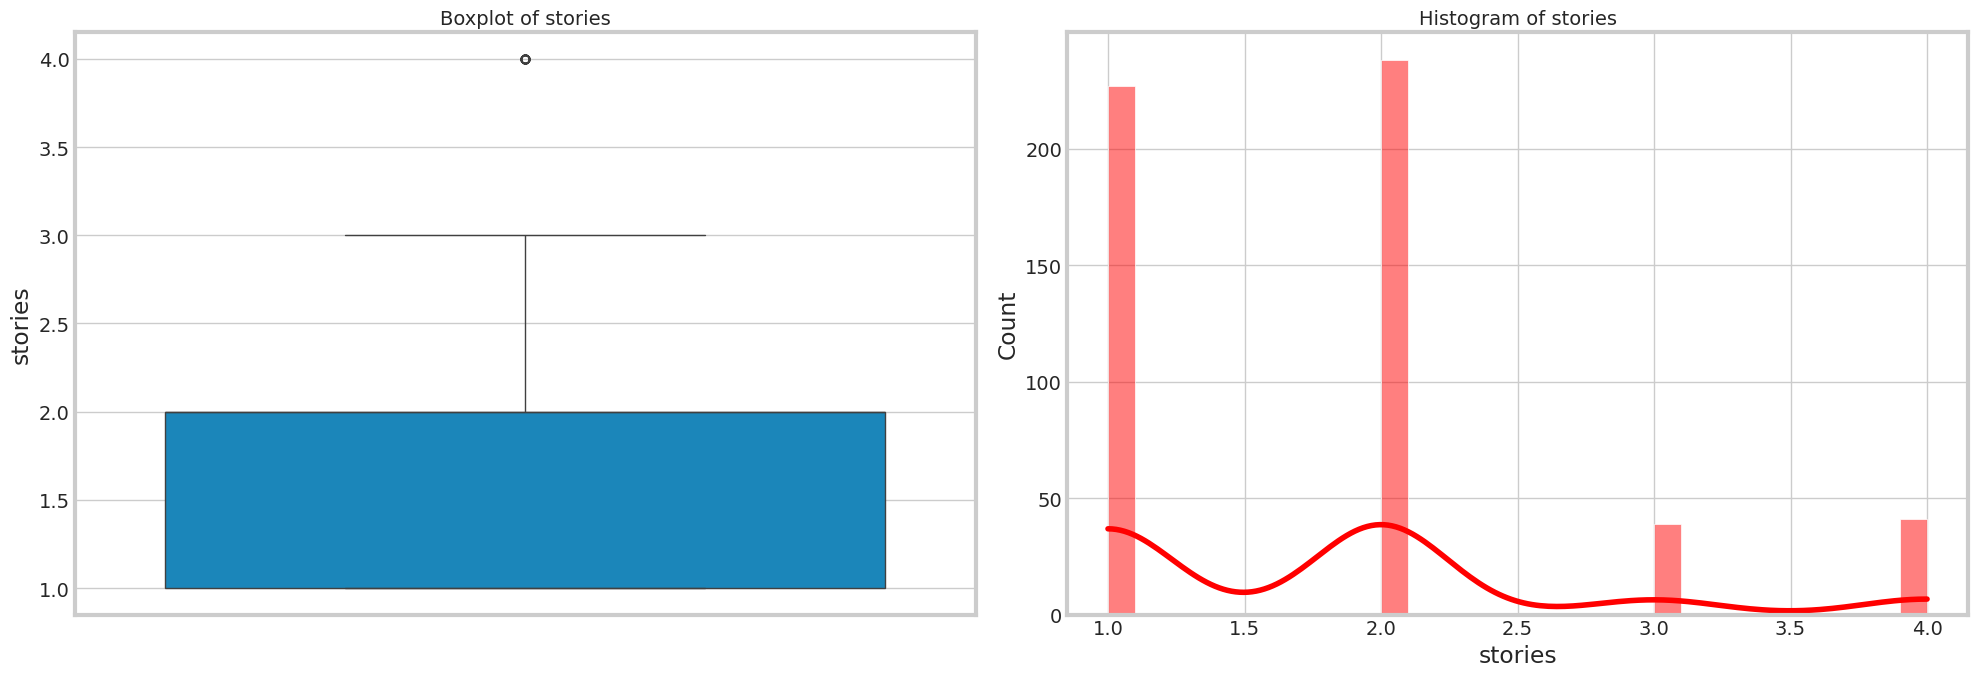

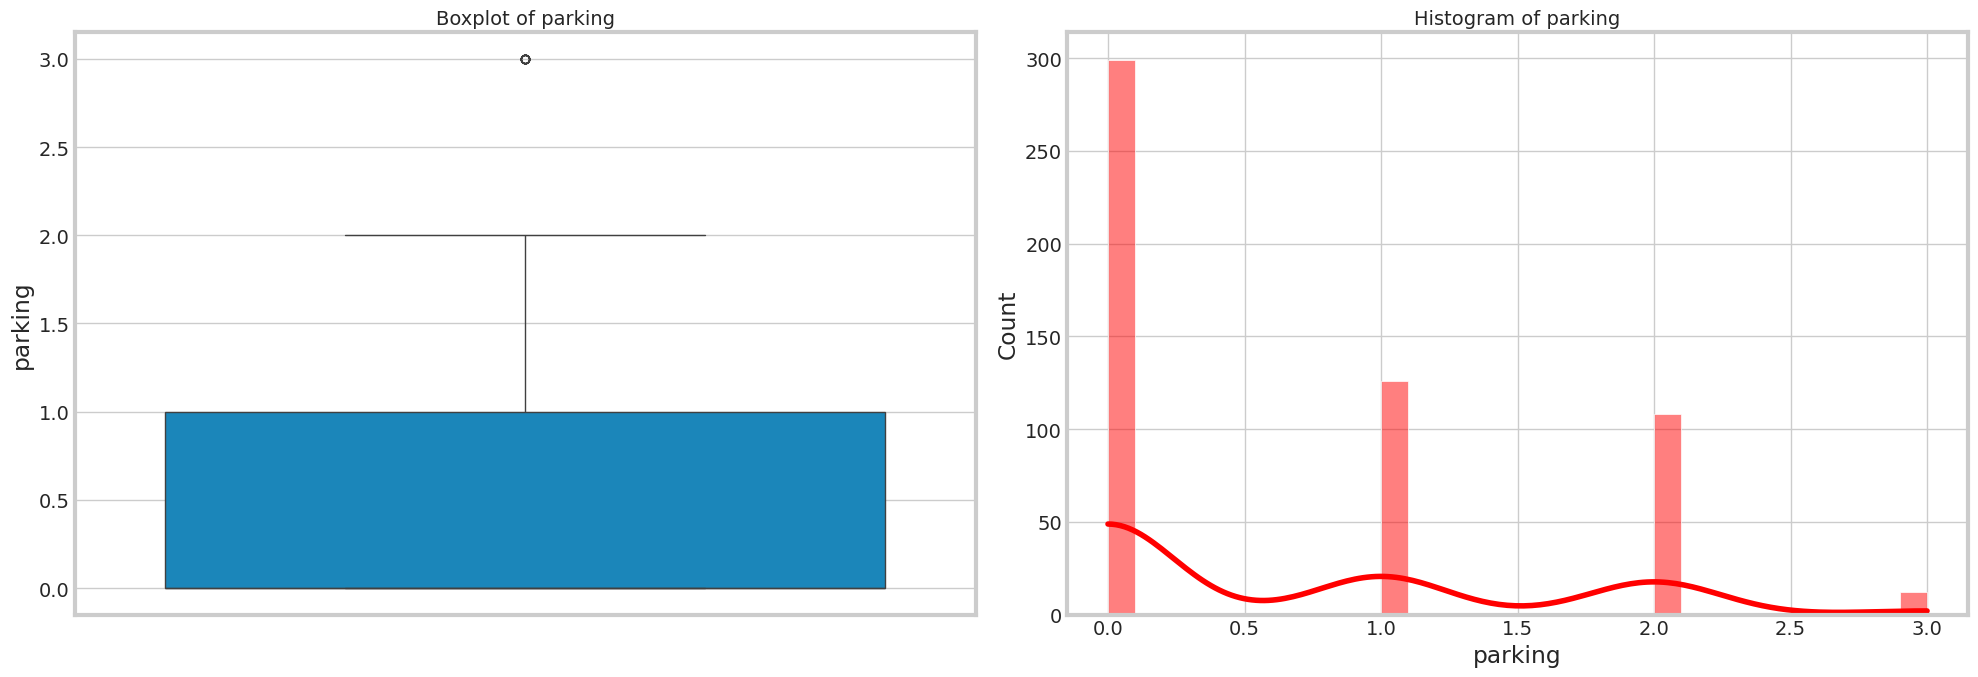

In [11]:
import numpy as np


# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Set plot style
sns.set_style("whitegrid")

# Loop through each numeric column
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    
    # Boxplot
    sns.boxplot(y=df[col], ax=ax[0])
    ax[0].set_title(f'Boxplot of {col}', fontsize=14)
    
    # Histogram
    sns.histplot(df[col], kde=True, color='red', bins=30, ax=ax[1])
    ax[1].set_title(f'Histogram of {col}', fontsize=14)
    
    plt.tight_layout()
    plt.show()



Correlation Matrix...


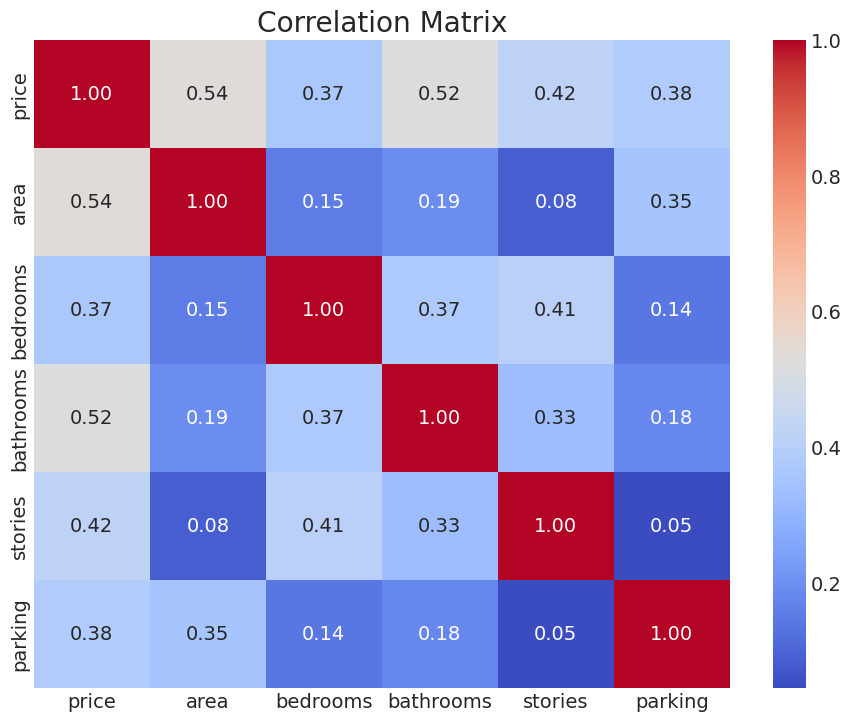

In [12]:
# Correlation Matrix
print("\nCorrelation Matrix...")
correlation_matrix = df.corr(numeric_only=True) # Add numeric_only=True
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

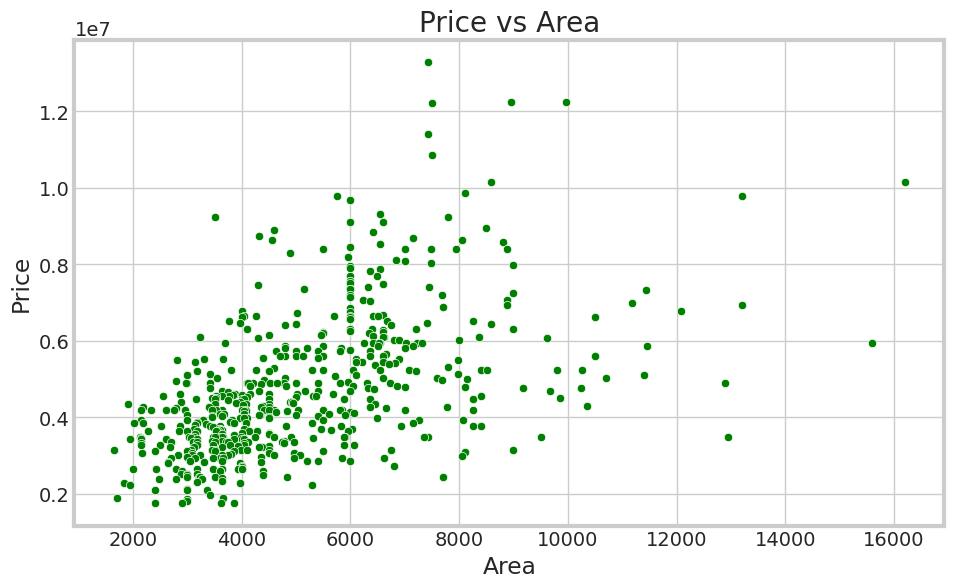

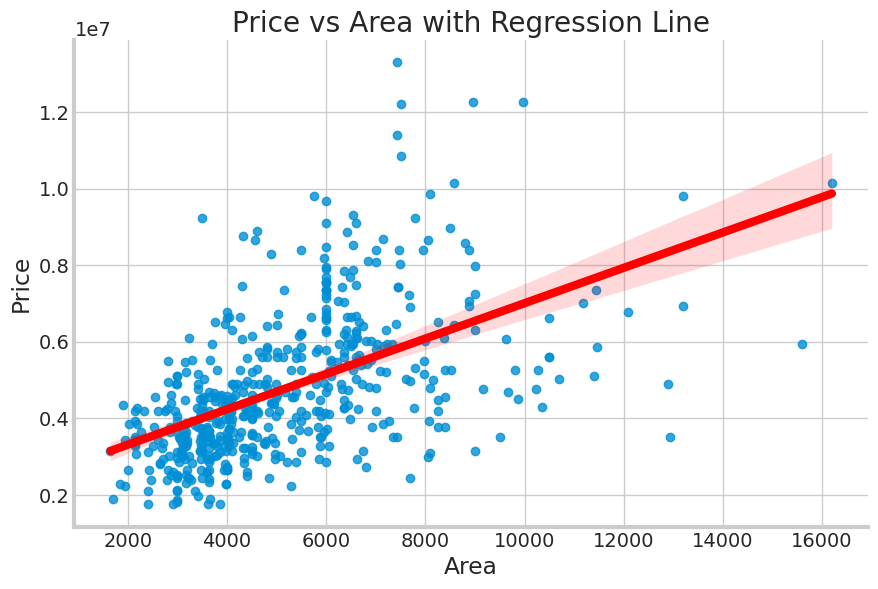

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, color='green')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Fit a regression line to see the trend
sns.lmplot(x='area', y='price', data=df, aspect=1.5, height=6, line_kws={'color': 'red'})
plt.title('Price vs Area with Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [14]:
# List of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                        'airconditioning', 'prefarea', 'furnishingstatus']

# Now perform ANOVA test for each categorical feature against price
from scipy.stats import f_oneway

for feature in categorical_features:
    groups = [df[df[feature] == category]['price'] for category in df[feature].unique()]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {feature} - F-statistic: {stat:.3f}, p-value: {p:.4f}")


ANOVA for mainroad - F-statistic: 52.492, p-value: 0.0000
ANOVA for guestroom - F-statistic: 37.928, p-value: 0.0000
ANOVA for basement - F-statistic: 19.689, p-value: 0.0000
ANOVA for hotwaterheating - F-statistic: 4.745, p-value: 0.0298
ANOVA for airconditioning - F-statistic: 140.163, p-value: 0.0000
ANOVA for prefarea - F-statistic: 66.259, p-value: 0.0000
ANOVA for furnishingstatus - F-statistic: 28.272, p-value: 0.0000


All the categorical features show statistically significant differences in mean prices (p-values less than 0.05). This indicates that these features likely have an impact on the price, and they could be important for modeling purposes. Specifically, features such as mainroad, guestroom, airconditioning, and prefarea seem to have strong impacts on the price, given their high F-statistics and low p-values.

In [16]:
print("price_bin Value Counts:\n", df['price_bin'].value_counts())
print("\nprice_bin Proportions:\n", df['price_bin'].value_counts(normalize=True))

price_bin Value Counts:
 price_bin
Medium    272
Low       137
High      136
Name: count, dtype: int64

price_bin Proportions:
 price_bin
Medium    0.499083
Low       0.251376
High      0.249541
Name: proportion, dtype: float64


price_bin
Medium    272
Low       137
High      136
Name: count, dtype: int64


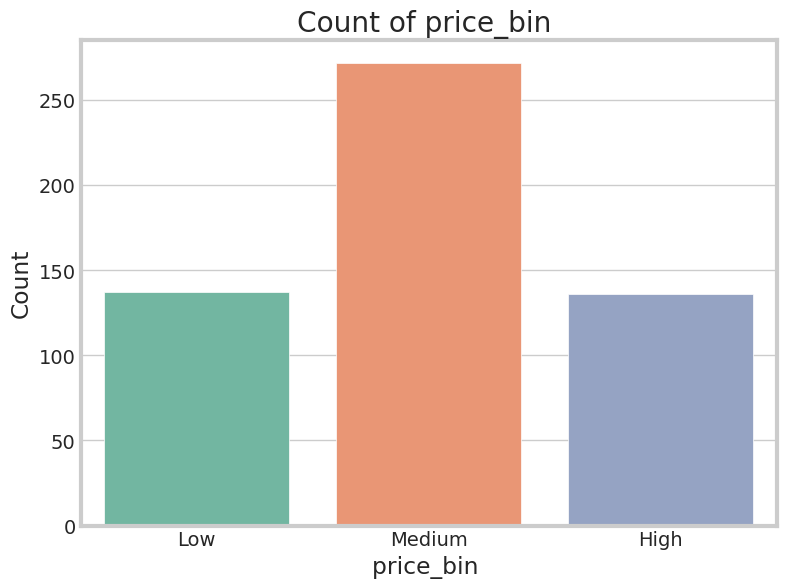

In [17]:

# Count of each furnishing status
print(df['price_bin'].value_counts())

# 2. Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='price_bin', data=df, palette='Set2')
plt.title('Count of price_bin ')
plt.xlabel('price_bin ')
plt.ylabel('Count')
plt.show()


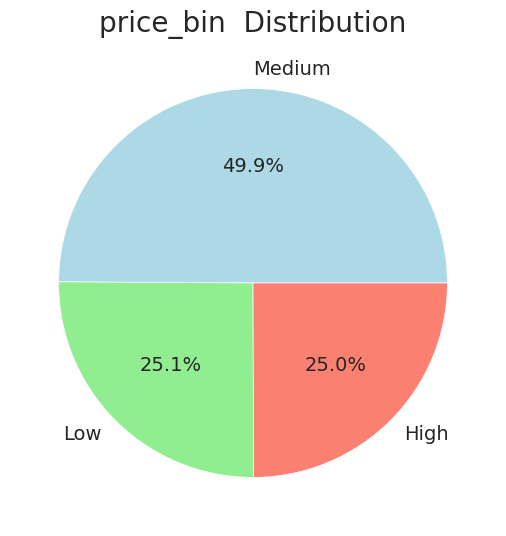

In [18]:
# 3. Pie Chart
plt.figure(figsize=(6, 6))
df['price_bin'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('price_bin  Distribution')
plt.ylabel('')
plt.show()


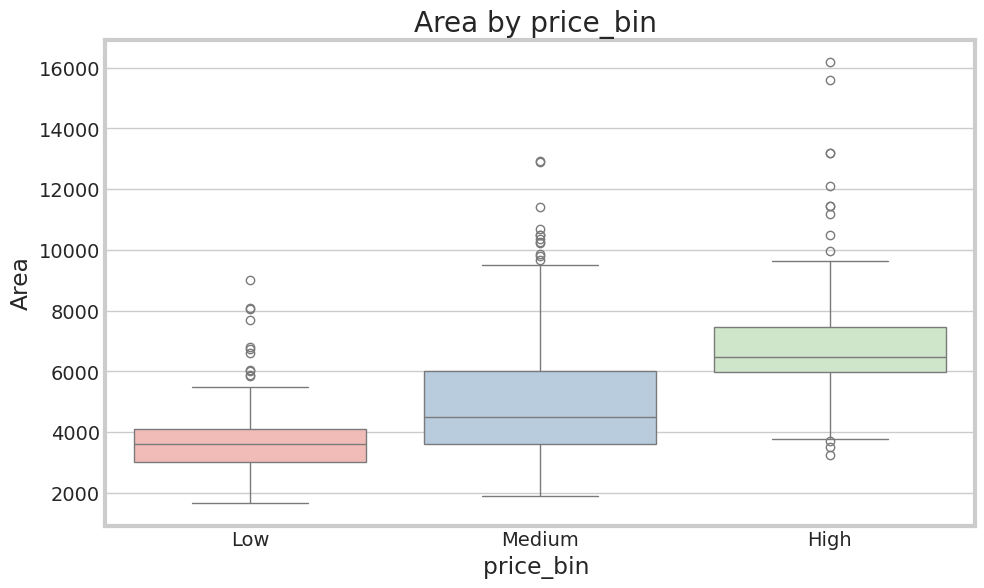

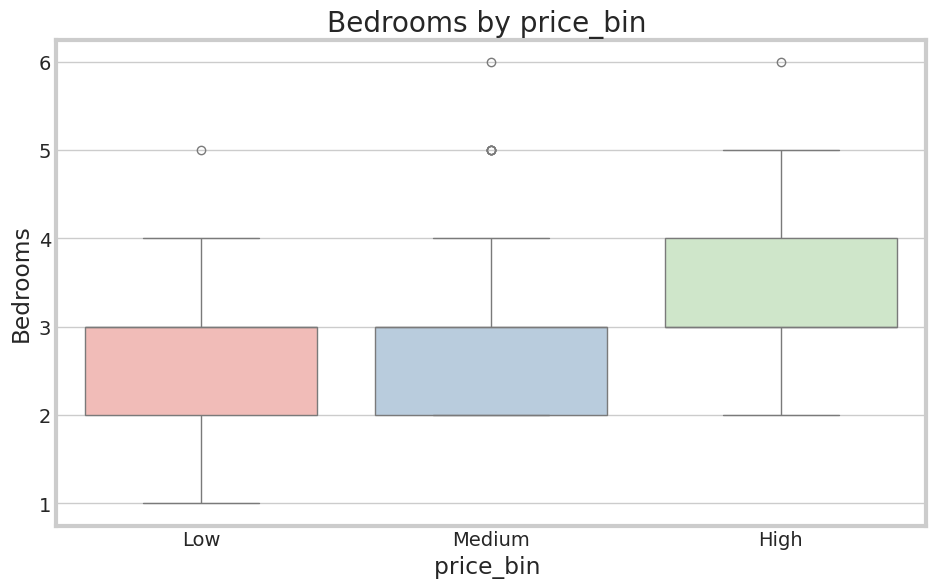

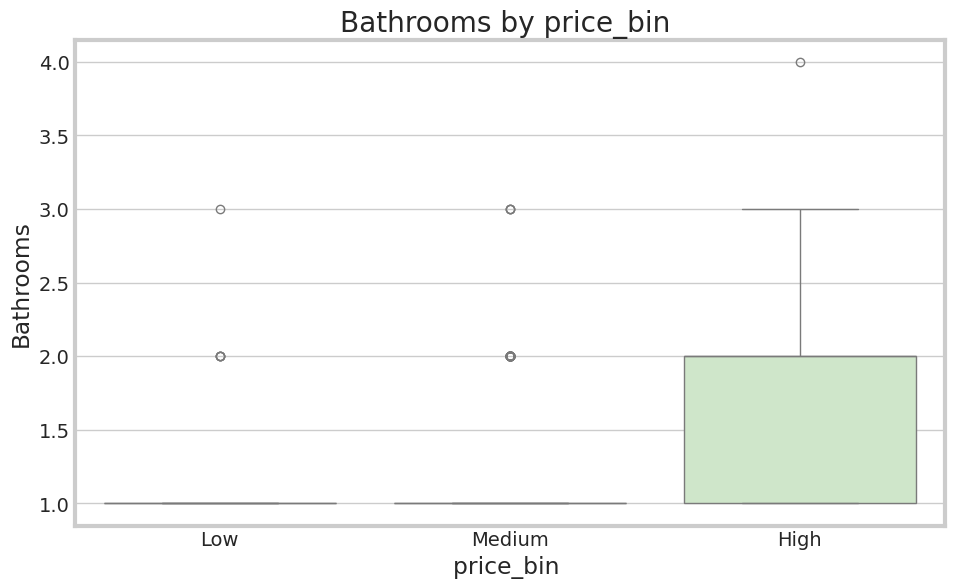

In [19]:
# 4. Boxplots of numerical features vs furnishingstatus
numerical_cols = [ 'area', 'bedrooms', 'bathrooms']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='price_bin', y=col, data=df, palette='Pastel1')
    plt.title(f'{col.capitalize()} by price_bin ')
    plt.xlabel('price_bin ')
    plt.ylabel(col.capitalize())
    plt.show()

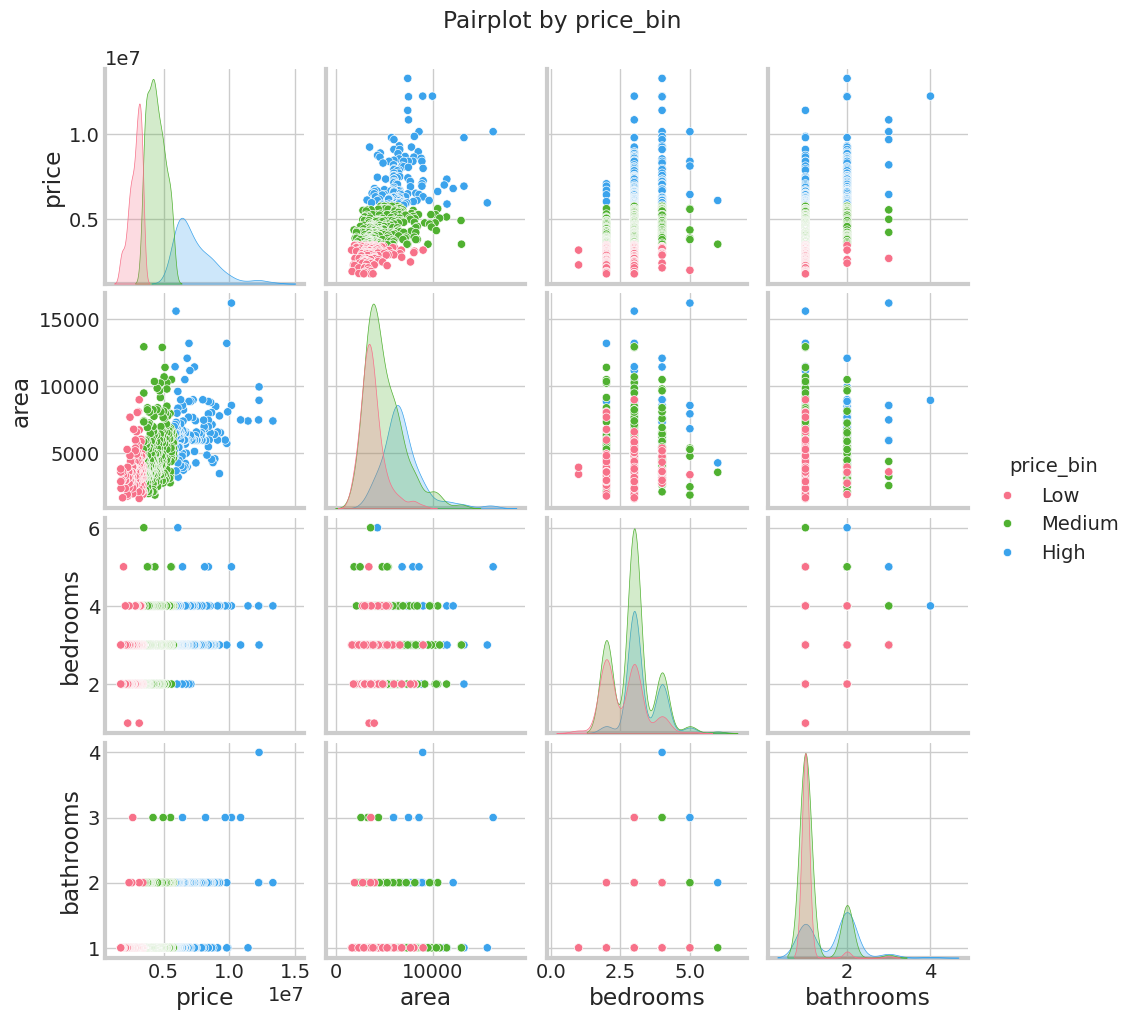

In [20]:
sns.pairplot(df, hue='price_bin', vars=['price', 'area', 'bedrooms', 'bathrooms'], palette='husl')
plt.suptitle('Pairplot by price_bin', y=1.02)
plt.show()


In [21]:
from scipy.stats import f_oneway

# Check if the difference in price, area, etc. is statistically significant across furnishing types
features = [ 'area', 'bedrooms', 'bathrooms', 'parking']

for feature in features:
    groups = [df[df['price_bin'] == status][feature] for status in df['price_bin'].unique()]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {feature} - F-statistic: {stat:.3f}, p-value: {p:.4f}")


ANOVA for area - F-statistic: 93.047, p-value: 0.0000
ANOVA for bedrooms - F-statistic: 31.663, p-value: 0.0000
ANOVA for bathrooms - F-statistic: 67.944, p-value: 0.0000
ANOVA for parking - F-statistic: 32.818, p-value: 0.0000


# Feature engineering

In [22]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['stories']


# DataPreprocessing

In [23]:
obj = df.select_dtypes(include = 'object')
encoder = LabelEncoder()
for feature in obj:
    df[feature] = encoder.fit_transform(df[feature])

In [24]:
#defining inputs and outputs as X and y respectively
X = df.drop(['price_bin', 'price'], axis=1)
y = df['price_bin']
y2 = df['price']

# For Classification

In [25]:
# Splitting The Dataset for Testing & Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
# Initialize SMOTE for multiclass classification
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:", Counter(y_train))


Class distribution before SMOTE: Counter({'Medium': 198, 'High': 93, 'Low': 90})
Class distribution after SMOTE: Counter({'High': 198, 'Medium': 198, 'Low': 198})


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn import metrics

Logistic Regression Accuracy: 0.6585
              precision    recall  f1-score   support

        High       0.68      0.79      0.73        43
         Low       0.66      0.70      0.68        47
      Medium       0.64      0.55      0.59        74

    accuracy                           0.66       164
   macro avg       0.66      0.68      0.67       164
weighted avg       0.66      0.66      0.65       164

[[34  0  9]
 [ 0 33 14]
 [16 17 41]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

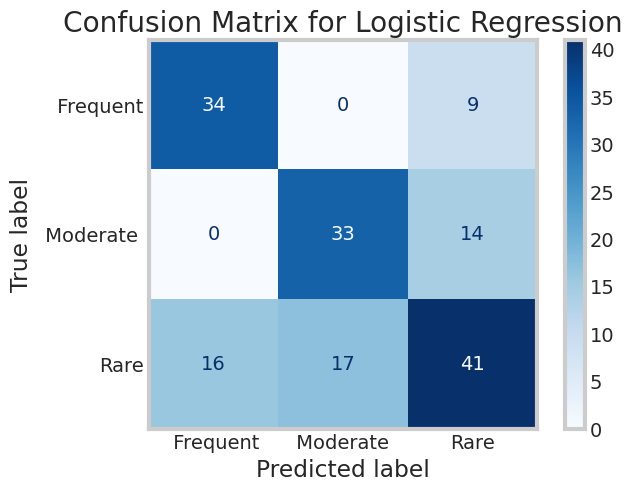

Random Forest Accuracy: 0.7073
              precision    recall  f1-score   support

        High       0.74      0.74      0.74        43
         Low       0.76      0.66      0.70        47
      Medium       0.66      0.72      0.69        74

    accuracy                           0.71       164
   macro avg       0.72      0.71      0.71       164
weighted avg       0.71      0.71      0.71       164

[[32  0 11]
 [ 0 31 16]
 [11 10 53]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

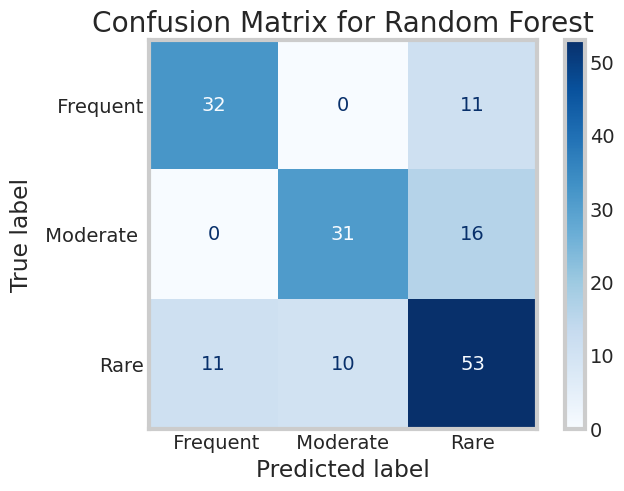

Gradient Boosting Accuracy: 0.7012
              precision    recall  f1-score   support

        High       0.74      0.81      0.78        43
         Low       0.71      0.64      0.67        47
      Medium       0.67      0.68      0.67        74

    accuracy                           0.70       164
   macro avg       0.71      0.71      0.71       164
weighted avg       0.70      0.70      0.70       164

[[35  0  8]
 [ 0 30 17]
 [12 12 50]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

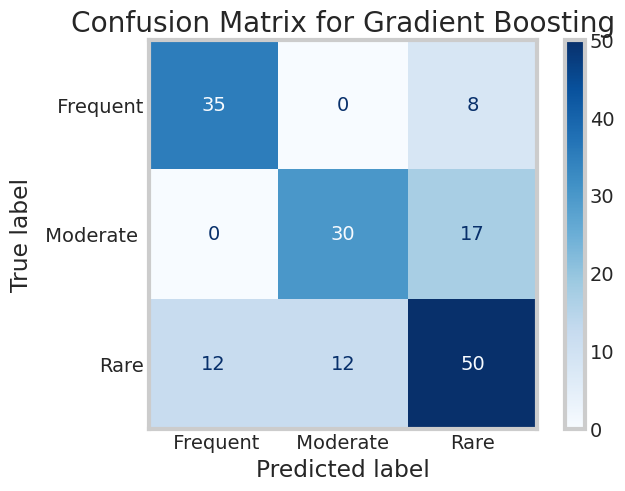

Support Vector Machine Accuracy: 0.6707
              precision    recall  f1-score   support

        High       0.73      0.81      0.77        43
         Low       0.65      0.66      0.65        47
      Medium       0.65      0.59      0.62        74

    accuracy                           0.67       164
   macro avg       0.67      0.69      0.68       164
weighted avg       0.67      0.67      0.67       164

[[35  0  8]
 [ 0 31 16]
 [13 17 44]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

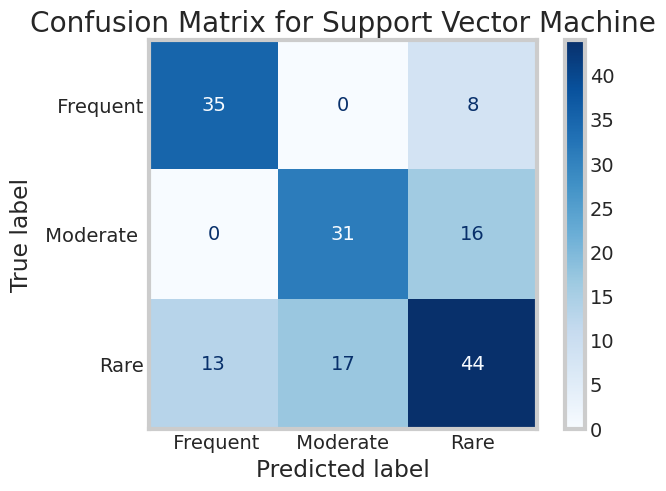

In [29]:
# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 120)

    # Plot confusion matrix without gridlines
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[' Frequent', ' Moderate ','Rare'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.gca().grid(False)  # Disable gridlines
    plt.show()


Tuning hyperparameters for Logistic Regression...
Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.6463
              precision    recall  f1-score   support

        High       0.67      0.81      0.74        43
         Low       0.62      0.70      0.66        47
      Medium       0.64      0.51      0.57        74

    accuracy                           0.65       164
   macro avg       0.65      0.68      0.66       164
weighted avg       0.65      0.65      0.64       164

[[35  0  8]
 [ 1 33 13]
 [16 20 38]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

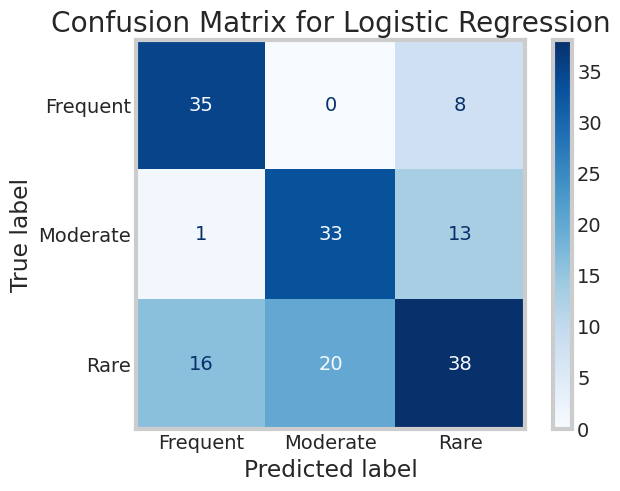

Tuning hyperparameters for Random Forest...
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.7073
              precision    recall  f1-score   support

        High       0.74      0.74      0.74        43
         Low       0.76      0.66      0.70        47
      Medium       0.66      0.72      0.69        74

    accuracy                           0.71       164
   macro avg       0.72      0.71      0.71       164
weighted avg       0.71      0.71      0.71       164

[[32  0 11]
 [ 0 31 16]
 [11 10 53]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

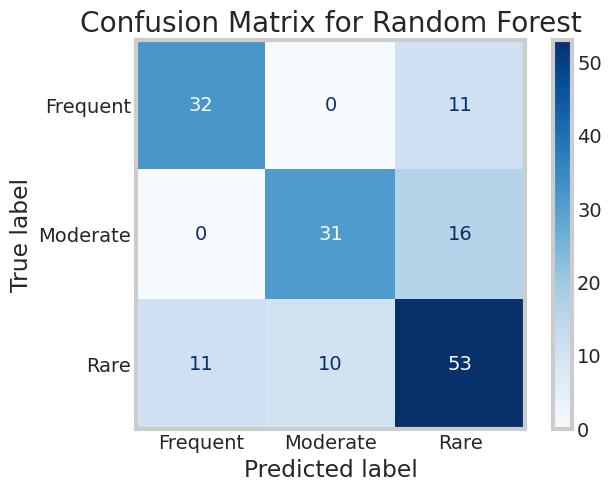

Tuning hyperparameters for Gradient Boosting...
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Accuracy: 0.6890
              precision    recall  f1-score   support

        High       0.70      0.77      0.73        43
         Low       0.74      0.66      0.70        47
      Medium       0.65      0.66      0.66        74

    accuracy                           0.69       164
   macro avg       0.70      0.70      0.70       164
weighted avg       0.69      0.69      0.69       164

[[33  0 10]
 [ 0 31 16]
 [14 11 49]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

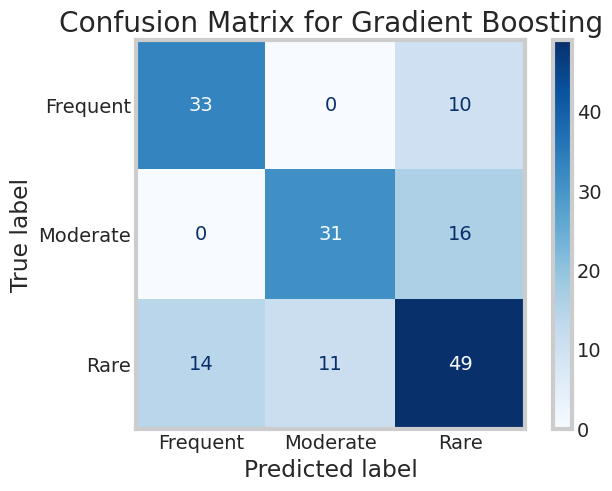

Tuning hyperparameters for Support Vector Machine...
Support Vector Machine Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine Accuracy: 0.6829
              precision    recall  f1-score   support

        High       0.73      0.74      0.74        43
         Low       0.66      0.66      0.66        47
      Medium       0.67      0.66      0.67        74

    accuracy                           0.68       164
   macro avg       0.69      0.69      0.69       164
weighted avg       0.68      0.68      0.68       164

[[32  1 10]
 [ 2 31 14]
 [10 15 49]]
------------------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

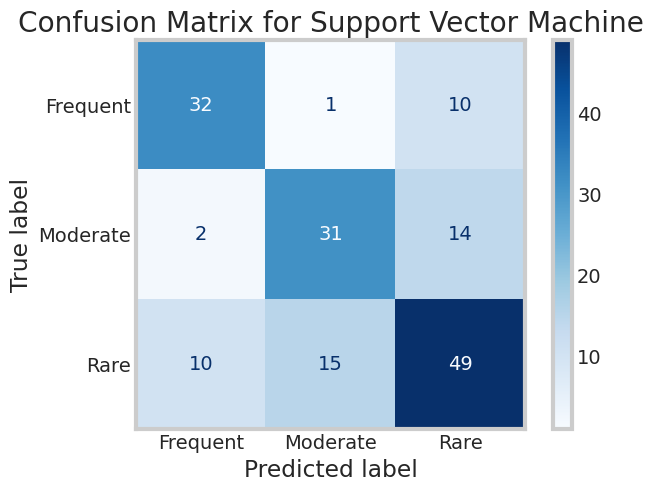

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f'Tuning hyperparameters for {name}...')
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Best Parameters: {grid_search.best_params_}')
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 120)

    # Plot confusion matrix without gridlines
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Frequent', 'Moderate', 'Rare'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.gca().grid(False)  # Disable gridlines
    plt.show()

# For Regression:

In [31]:
def print_evaluate(true, predicted):  
    # Mean Absolute Error
    mae = metrics.mean_absolute_error(true, predicted)
    # Mean Squarred Error
    mse = metrics.mean_squared_error(true, predicted)
    # Calculating R2 Score
    r2_score = metrics.r2_score(true, predicted)
    # Calculating RMSE Score
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    
    # Calculating mean_absolute_percentage_error
    mape = metrics.mean_absolute_percentage_error(true, predicted)

    print('Mean Absolute Error', mae)
    print('Mean Squarred Error', mse)
    print('Root Mean Squarred Error', rmse)
    print('mean_absolute_percentage_error', mape)
    print('R2 Score:', r2_score)
    
def evaluate(true, predicted):
    
    # Calculating MAE Score
    mae = metrics.mean_absolute_error(true, predicted)
    # Calculatinog MSE Score
    mse = metrics.mean_squared_error(true, predicted)
    # Calculationg R2 Score
    r2_score = metrics.r2_score(true, predicted)
    # Calculating RMSE Score
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    
    mape = metrics.mean_absolute_percentage_error(true, predicted)
    # Return ing Score
    return mae, mse, rmse,mape ,r2_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.3, random_state=42)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print('Test set evaluation for linear regression:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation for linear regression:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','mape','r2_score'])

Test set evaluation for linear regression:
_____________________________________
Mean Absolute Error 925543.548315657
Mean Squarred Error 1535047758428.051
Root Mean Squarred Error 1238970.4429194634
mean_absolute_percentage_error 0.21335770783050942
R2 Score: 0.6435419628959105
Train set evaluation for linear regression:
_____________________________________
Mean Absolute Error 719440.7398749286
Mean Squarred Error 965153171508.6732
Root Mean Squarred Error 982422.0943711889
mean_absolute_percentage_error 0.1579632714315514
R2 Score: 0.6927795109061218


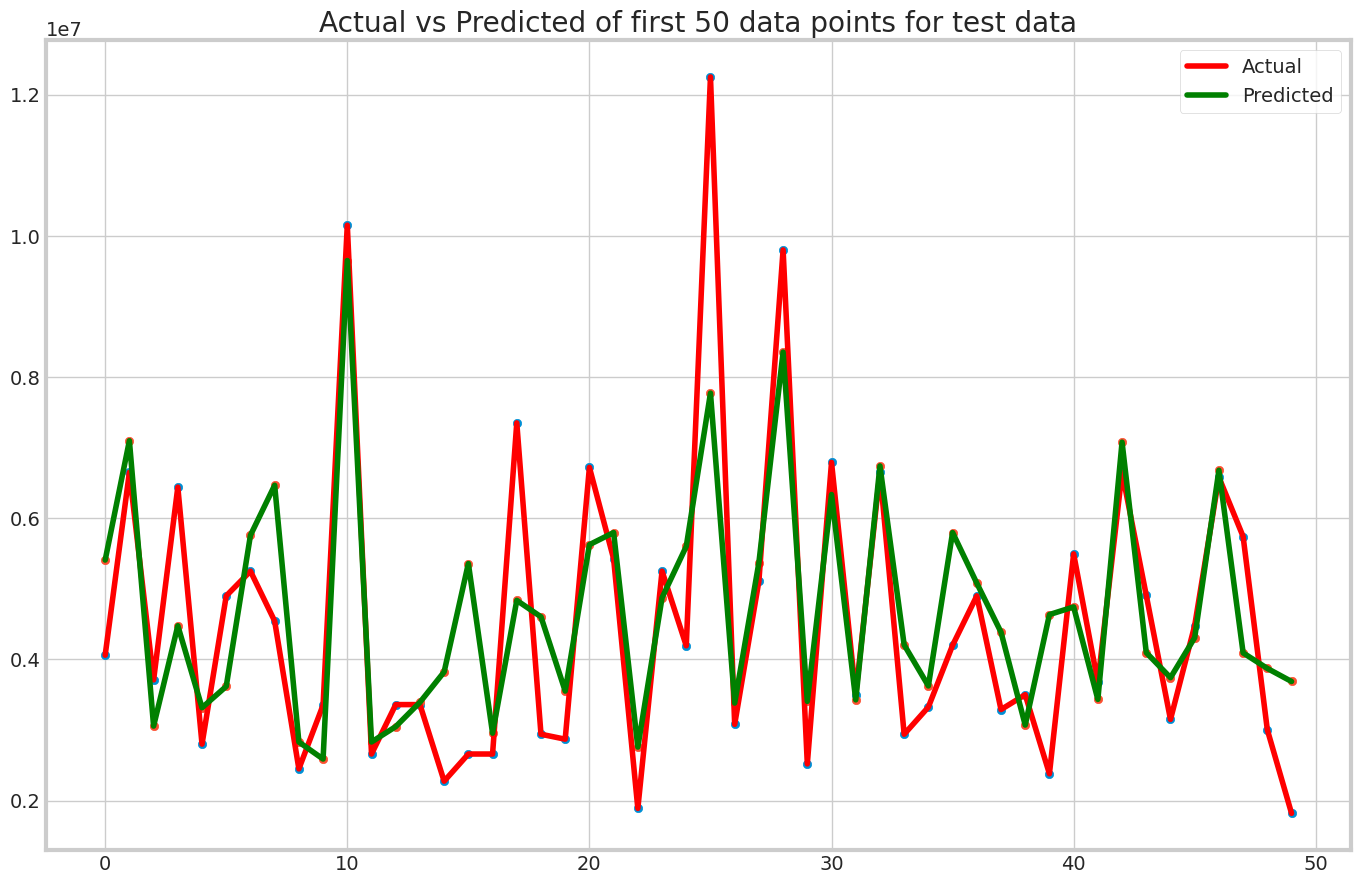

In [34]:
# Comparison of actual vs predicted
comparison =pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred})


#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:50])) , y_test[0:50], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred[0:50])) , test_pred[0:50], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:50])) , y_test[0:50], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred[0:50])) , test_pred[0:50], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted of first 50 data points for test data')
predictions=pd.DataFrame([y_test.reset_index(drop=True),test_pred]).T
predictions.columns=['Actual','Predicted_lr']


Test set evaluation for linear regression:
_____________________________________
Mean Absolute Error 1146618.3536585367
Mean Squarred Error 2655175933878.6587
Root Mean Squarred Error 1629471.0595400762
mean_absolute_percentage_error 0.255196545405879
R2 Score: 0.38343364474495867
Train set evaluation for linear regression:
_____________________________________
Mean Absolute Error 5695.538057742782
Mean Squarred Error 2705417322.8346457
Root Mean Squarred Error 52013.6263188277
mean_absolute_percentage_error 0.0019389694625388237
R2 Score: 0.9991388313713717


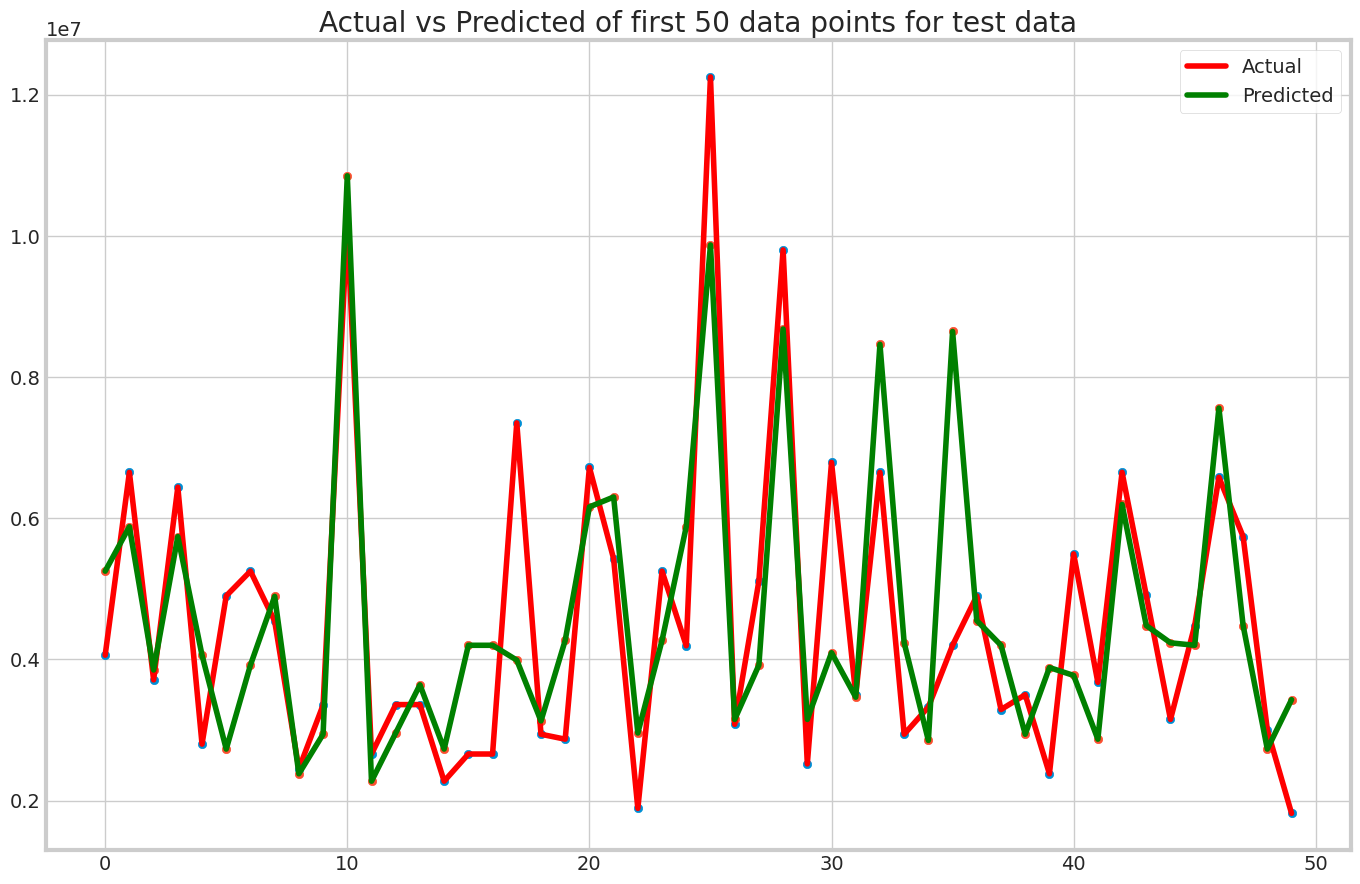

In [35]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
test_pred_dt = dt.predict(X_test)
train_pred_dt = dt.predict(X_train)
print('Test set evaluation for linear regression:\n_____________________________________')
print_evaluate(y_test, test_pred_dt)
print('Train set evaluation for linear regression:\n_____________________________________')
print_evaluate(y_train, train_pred_dt)
results_df_2 = pd.DataFrame(data=[["Decision tree Regression", *evaluate(y_test, test_pred_dt) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','mape','r2_score'])
# Comparison of actual vs predicted
comparison =pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_dt})


#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:50])) , y_test[0:50], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_dt[0:50])) , test_pred_dt[0:50], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:50])) , y_test[0:50], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_dt[0:50])) , test_pred_dt[0:50], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted of first 50 data points for test data')
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation for random forest regressor:
_____________________________________
Mean Absolute Error 951475.6359756099
Mean Squarred Error 1790762642827.574
Root Mean Squarred Error 1338193.7986807344
mean_absolute_percentage_error 0.22189827006854623
R2 Score: 0.5841616437814772
Train set evaluation for random forest regressor:
_____________________________________
Mean Absolute Error 281359.5593175853
Mean Squarred Error 157486565763.83878
Root Mean Squarred Error 396845.7707521132
mean_absolute_percentage_error 0.06163676012734256
R2 Score: 0.9498700297652733


Text(0.5, 1.0, 'Actual vs Predicted of first 50 data points for test data')

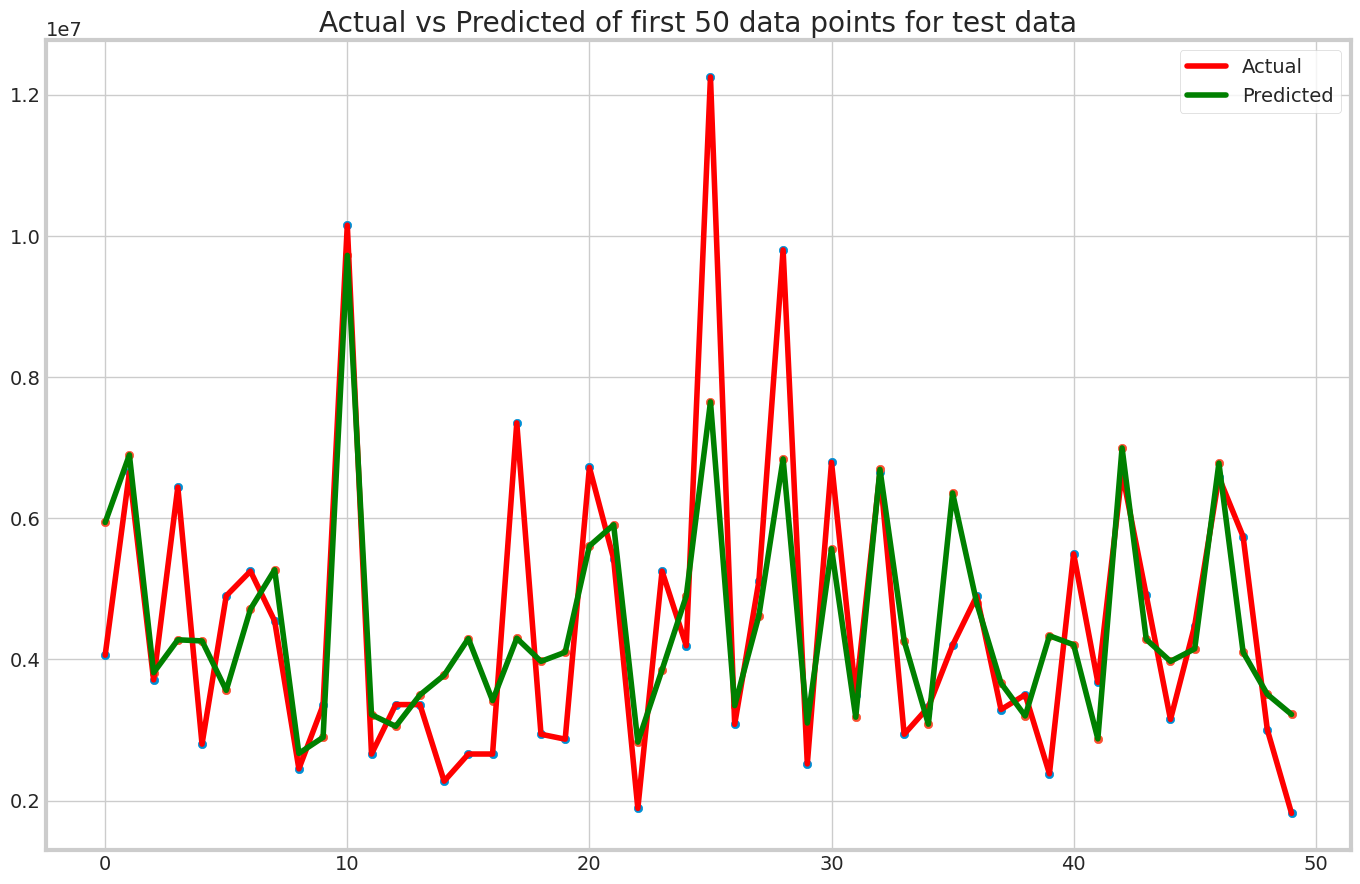

In [36]:
rf_reg = RandomForestRegressor(random_state=1000)
rf_reg.fit(X_train, y_train)
test_pred_rf = rf_reg.predict(X_test)
train_pred_rf = rf_reg.predict(X_train)

print('Test set evaluation for random forest regressor:\n_____________________________________')
print_evaluate(y_test, test_pred_rf)

print('Train set evaluation for random forest regressor:\n_____________________________________')
print_evaluate(y_train, train_pred_rf)
results_df_2 = pd.DataFrame(data=[["Random forest Regression", *evaluate(y_test, test_pred_rf) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','mape','r2_score'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
# Comparison of actual vs predicted
comparison =pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_rf})


#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:50])) , y_test[0:50], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_rf[0:50])) , test_pred_rf[0:50], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:50])) , y_test[0:50], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_rf[0:50])) , test_pred_rf[0:50], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted of first 50 data points for test data')

In [37]:
results_df

,Model,MAE,MSE,RMSE,mape,r2_score
0,Linear Regression,9.255435e+05,1.535048e+12,1.238970e+06,0.213358,0.643542
1,Decision tree Regression,1.146618e+06,2.655176e+12,1.629471e+06,0.255197,0.383434
2,Random forest Regression,9.514756e+05,1.790763e+12,1.338194e+06,0.221898,0.584162
